# Greedy Algorithm on MaxCut Problem

In this notebook, we introduce Greedy Algorithm implementation for the MaxCut Problem.

1. [Introduction](#intro)
2. [Greedy Function](#greedy-function)
3. [Testing](#testing)
4. [Benchmarked Results](#benchmarked-results)

<a id='intro'></a>
## 1. Introduction

### Imports

In [ ]:
import copy
import time
from typing import List, Union
%pip install numpy as np
%pip install networkx as nx
from util import read_nxgraph
from util import obj_maxcut
from util import transfer_nxgraph_to_weightmatrix

### Standard Library Imports:

1. import copy
    - Allows shallow and deep copying of objects.

2. import time
    - For calculating execution time, so as to measure efficiency and optimization

3. from typing import List, Union
    - Provides type hints for improved readability and error checking.

### External Library Imports:

4. %pip install numpy as np
    - For numerical computations and array manipulation.

5. %pip install networkx as nx
    - For creating, analyzing, and manipulating graphs and networks.

### Custom Library Imports (from util.py):

6. from util import read_nxgraph
    - Reads graph data from an input and returns it as a nx.Graph (networkx.Graph) object.

7. from util import obj_maxcut
    - Computes the score of a maxcut graph, given a solution.

8. from util import transfer_nxgraph_to_weightmatrix
    - Converts a NetworkX graph into a weight matrix representation.


<a id='greedy-function'></a>
# 2. Greedy Function

In [ ]:
def greedy_maxcut(init_solution, num_steps: int, graph: nx.Graph) -> (int, Union[List[int], np.array], List[int]):
# -------------------------------------- #
#         Function Initializations       #
# -------------------------------------- #
    print('greedy')
    start_time = time.time()
    num_nodes = int(graph.number_of_nodes())
    nodes = list(range(num_nodes))
    assert sum(init_solution) == 0
    if num_steps is None:
        num_steps = num_nodes
    curr_solution = copy.deepcopy(init_solution)
    curr_score: int = obj_maxcut(curr_solution, graph)
    init_score = curr_score
    scores = []
# -------------------------------------- #
#           Loop through graph           #
# -------------------------------------- #
    for iteration in range(num_nodes):
        if iteration >= num_steps:
            break
        score = obj_maxcut(curr_solution, graph)
        print(f"iteration: {iteration}, score: {score}")
        traversal_scores = []
        traversal_solutions = []
# -------------------------------------- #
#              Nested Loop               #
# -------------------------------------- #
        # calc the new solution when moving to a new node. Then store the scores and solutions.
        for node in nodes:
            new_solution = copy.deepcopy(curr_solution)
            # search a new solution and calc obj
            new_solution[node] = (new_solution[node] + 1) % 2
            new_score = obj_maxcut(new_solution, graph)
            traversal_scores.append(new_score)
            traversal_solutions.append(new_solution)
# -------------------------------------- #
#             Find best score            #
# -------------------------------------- #
        best_score = max(traversal_scores)
        index = traversal_scores.index(best_score)
        best_solution = traversal_solutions[index]
        if best_score > curr_score:
            scores.append(best_score)
            curr_score = best_score
            curr_solution = best_solution
        else:
            break
# -------------------------------------- #
#         Outputs/Print Statements       #
# -------------------------------------- #
    print("score, init_score of greedy", curr_score, init_score)
    print("scores: ", traversal_scores)
    print("solution: ", curr_solution)
    running_duration = time.time() - start_time
    print('running_duration: ', running_duration)
    return curr_score, curr_solution, scores

### Function Initializations

- Initializes function start time, total number of nodes, and the list of all nodes.
- Makes sure the initial solution does not equal 0.
- num_steps is the total number of iterations we will pursue. If it does not have a value (None) in the parameter, we will set it equal to num_nodes.
- Makes a clone of the initial solution.
- curr_score, curr_solution, and scores will be output at the end of the program.

### Loop Through Graph

- for each iteration, up to num_steps, the path with the highest score is chosen to move on to.
- scores and solutions are recorded at the beginning of each loop.
- We use the obj_maxcut function to find the score of each nested loop's iterations to calculate which path we should take; these are stored in the temp vars we created at the beginning.

### Find Best Score

- After finding the traversal scores, we find the one with the best (highest) value, and if it is higher than the current score, we move onto that node/path. If the score is not higher than curr_score, the program is at a maxima and will not continue, ending the loop.

### Outputs/Print Statements

- The final and initial score, as well as a list of all the scores inclusive are output.
- curr_solution is output.
- The runtime is output.

<a id='testing'></a>
# 3. Testing

In [ ]:
if __name__ == '__main__':
    # read data
    graph = read_nxgraph('./data/syn/syn_50_176.txt')
    weightmatrix = transfer_nxgraph_to_weightmatrix(graph)
    # run alg
    num_steps = 30
    alg_name = 'GR'

    # init_solution
    init_solution = [0] * graph.number_of_nodes()
    gr_score, gr_solution, gr_scores = greedy_maxcut(init_solution, num_steps, graph)


### Read Data

- In this section, different txt graph files can be input. In the data folder of this repository, there are multiple gsets of varying complexity and size. Bigger graphs take longer to iterate through, expectedly.

### Run Alg

- In this section, the number of total steps taken can be manipulated. The loop in the greedy function will terminate once the total number of nodes has been reached, however the num_steps variable can allow us to end it earlier.

### Init_Solution

- In this section, we create a starting point for our greedy function to iteratively improve upon. For this purpose we initialize all nodes to 0 to ensure a valid starting point.

<a id='benchmarked-results'></a>
# 4. Benchmarked Results

Due to the inefficiency of the greedy algorithm, the normal 7 Gset graphs we were using to benchmark all MaxCut algorithms were not feasible. Therefore, we only opted to provide data for two of them: Gset 14 and Gset 15

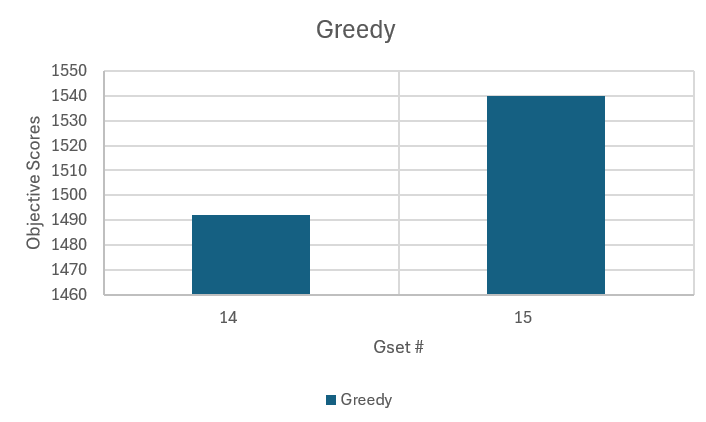